In [1]:
import pandas as pd

In [2]:
file_path = 'insurance_claims.csv'

df = pd.read_csv(file_path)

print(df.head())

   months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       2014-10-17           OH   
1                 228   42         342868       2006-06-27           IN   
2                 134   29         687698       2000-09-06           OH   
3                 256   41         227811       1990-05-25           IL   
4                 228   44         367455       2014-06-06           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip  ... police_report_available total_claim_amount injury_claim  \
0       466132  ...      

In [3]:
all_columns = df.columns
print("All Columns:")
print(all_columns)

All Columns:
Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')


In [9]:
# Get all unique values in the specified column
column_name = 'incident_severity'
unique_values = df[column_name].unique()

# Print the unique values
print(f"Unique values in '{column_name}':")
print(unique_values)

Unique values in 'incident_severity':
['Major Damage' 'Minor Damage' 'Total Loss' 'Trivial Damage']


In [5]:

# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Assuming 'df' is your DataFrame with the specified columns

# Create a copy of the DataFrame without modifying the original
df_copy = df.copy()

# Drop unnecessary columns from the copy
columns_to_drop = ['policy_number', 'policy_bind_date', 'incident_date', 'incident_location', '_c39']
df_copy = df_copy.drop(columns=columns_to_drop, axis=1)

# Handle missing values if any
# For simplicity, you can use df_copy.dropna() to remove rows with missing values,
# or df_copy.fillna() to impute missing values.

# Encode categorical variables
label_encoder = LabelEncoder()
categorical_columns = df_copy.select_dtypes(include=['object']).columns

for column in categorical_columns:
    df_copy[column] = label_encoder.fit_transform(df_copy[column])

# Define features (X) and target variable (y)
X = df_copy.drop('fraud_reported', axis=1)
y = df_copy['fraud_reported']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest classifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
random_forest.fit(X_train, y_train)

# Make predictions on the test set
y_pred = random_forest.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)


Accuracy: 0.7250

Confusion Matrix:
[[129  16]
 [ 39  16]]

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.89      0.82       145
           1       0.50      0.29      0.37        55

    accuracy                           0.73       200
   macro avg       0.63      0.59      0.60       200
weighted avg       0.69      0.72      0.70       200



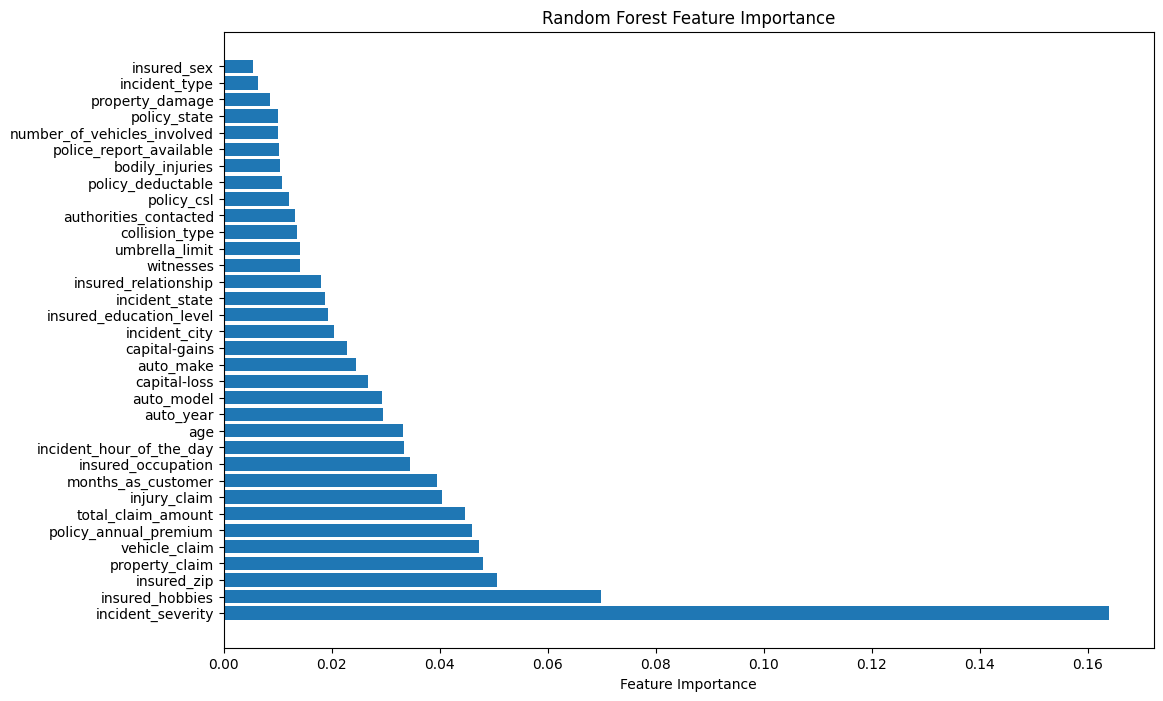

In [8]:
import matplotlib.pyplot as plt

# Create a Random Forest classifier with the best hyperparameters found during tuning
random_forest = RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_split=2, min_samples_leaf=1, max_features='auto', random_state=42)

# Fit the model on the entire dataset (you can use the training set or the full dataset depending on your preference)
random_forest.fit(X, y)

# Get feature importances
feature_importances = random_forest.feature_importances_

# Create a DataFrame to store feature names and their importance scores
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(12, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importance')
plt.show()


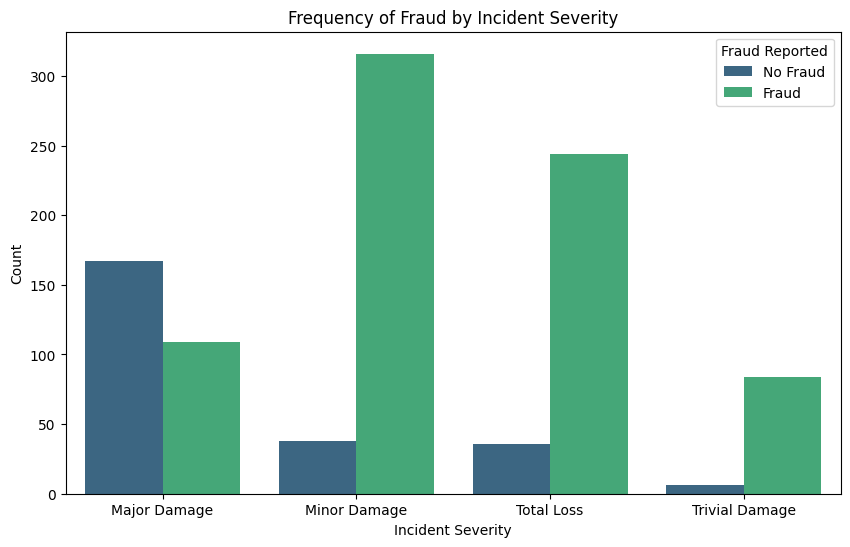

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your original DataFrame with the specified columns

# Create a count plot
plt.figure(figsize=(10, 6))
sns.countplot(x='incident_severity', hue='fraud_reported', data=df, palette='viridis')

# Set labels and title
plt.xlabel('Incident Severity')
plt.ylabel('Count')
plt.title('Frequency of Fraud by Incident Severity')

# Show legend
plt.legend(title='Fraud Reported', loc='upper right', labels=['No Fraud', 'Fraud'])

# Show the plot
plt.show()